# TP 2 SD204

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Stats modules

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

## Question 1

In [2]:
filename = 'datadm3.csv'
data_=pd.read_csv(filename,header=None)
data=np.array(data_)

data_.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


<b> Provide the number of the exploratory variables and the number of the observations. <b/>

There is 412 rows (for the 412 patients) and 211 columns for the 210 covariates and one for Y.

## Question 2 

<b> Are the exploratory variables centered? Normalized? And the output variable? <b/>

In [414]:
data_.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,...,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,2.009453e-17,4.018907e-18,0.000000,-2.009453e-18,-2.009453e-18,-4.018907e-18,1.105199e-17,0.000000,-8.037814e-18,-1.607563e-17,...,-4.018907e-18,0.000000,4.018907e-18,-2.009453e-18,1.205672e-17,2.587171e-17,4.018907e-18,4.018907e-18,1.306145e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-0.716098,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-0.638769,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-0.579332,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,0.047394,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,0.040166,6.047571e-04,3.602406e-02,...,-2.994795e-02,0.025405,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,0.697512,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,0.578844,6.298078e-01,6.629150e-01,...,6.672697e-01,0.667664,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


All the covariates are centered and normalized. 
It isn't the case of output variable Y.

<b> Provide a scatter plot of four randomly chosen exploratory variables and the output variable <b/>

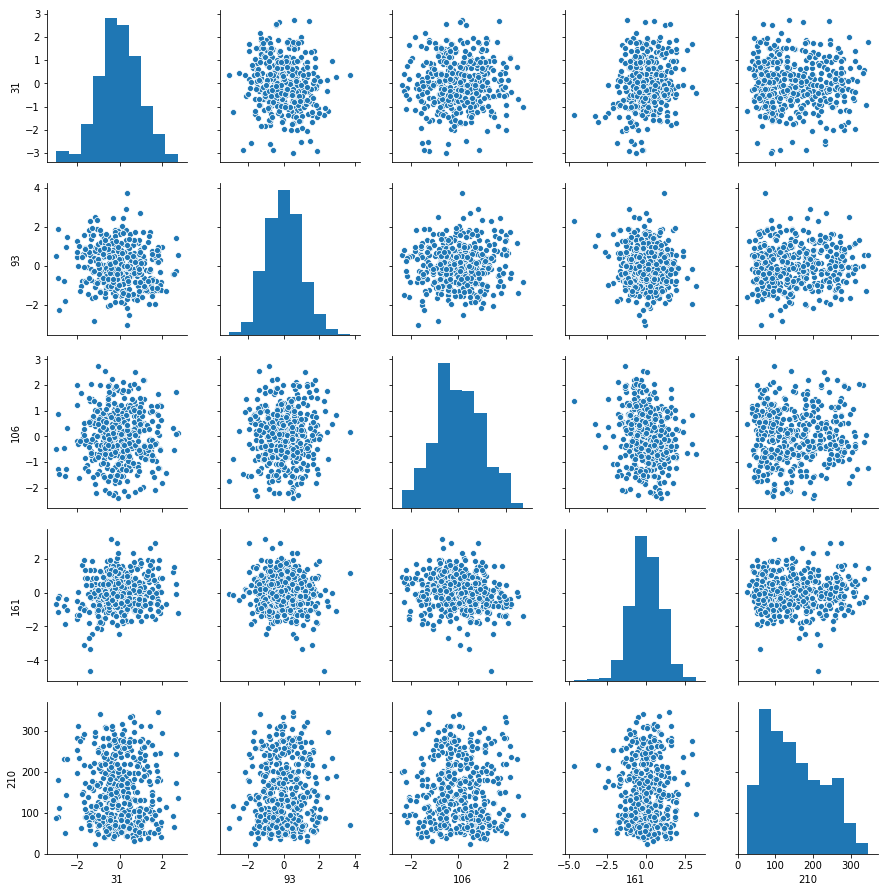

In [415]:
A=np.append(np.random.randint(0,209,4),210)
seaborn.pairplot(data_[A])

We can observe that the variables don't seem to be related and that they don't seem to be related to the scores neither.

## Question 3

<b> Create two samples: one to learn the model X train and one to test it X test .
Put 20% of the data set in the test sample. <b/>

In [416]:
percentage_20=int((20.0/100)*442)  #20% of 442 = 88

x_test=[]
x_train=[]
indexs=[]

while len(indexs)<=percentage_20:   #88 indexs in the list indexs
    a=rd.randint(0,442)
    if a not in indexs:
        indexs.append(a)
        
for i in range(442):                 #88 data in x_test
    if i in indexs:
        x_test.append(data[i])
        
    else:
        x_train.append(data[i])
        
    
x_train=np.array(x_train)
Y_train=x_train[:,210]
X_train=x_train[:,0:210]

x_test=np.array(x_test)
Y_test=x_test[:,210]
X_test=x_test[:,0:210]

<b> Provide the size of each of the 2 samples. <b>

In [417]:
print"The size of the training set is",X_train.shape
print"The size of the test set is",X_test.shape

The size of the training set is (353, 210)
The size of the test set is (89, 210)


## Question 4

<b> Provide the covariance matrix for X train . Plot the eigenvalues of the covariance matrix in descending order. <b/>

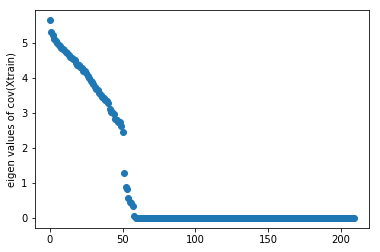

In [418]:
cov_X_train=np.cov(X_train.T)
eigen_values, eigen_vectors = np.linalg.eigh(cov_X_train)
sort_values = list(reversed(eigen_values))    #They are in the ascending order so we reverse them
sort_vectors = np.array(list(reversed(eigen_vectors)))

plt.plot(sort_values,marker='o',linestyle='None')
plt.ylabel('eigen values of cov(Xtrain)')
plt.show()

sort_vectors=sort_vectors[0:60]       #We keep only the corresponding eigen vectors

<b> Explain why does it make sense to keep only first PCA variables. <b/>


We keep only the first variables because the others are not significant.

## Question 5 

<b> Run linear regression (with intercept), then plot the values of the coefficients (but not for the intercept). <br> On another graph, do the same using the classical OLS. <b/>

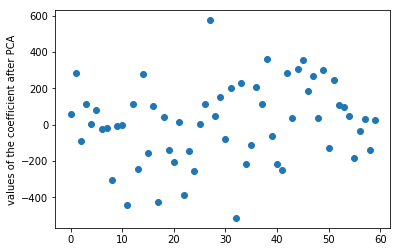

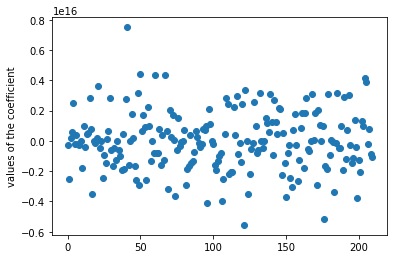

In [419]:
PCA_X_train=np.dot(X_train,sort_vectors.T)

Y=data[:,210]

### OLS with PCA 

ols1=LinearRegression().fit(PCA_X_train,Y_train)
plt.plot(ols1.coef_, 'o')
plt.ylabel('values of the coefficient after PCA')
plt.show()

### OLS without PCA

ols2=LinearRegression().fit(X_train,Y_train)
plt.plot(ols2.coef_, 'o')
plt.ylabel('values of the coefficient')
plt.show()

## Question 6

<b> Provide the intercept values for the 2 regressions from the previous question. <br> Also, provide the
mean value of the output variable Y (for the train set).<b/>

In [420]:
print'The intercept with PCA before OLS isols1.predict(X_train)', ols1.intercept_
print'The intercept without PCA before OLS is', ols2.intercept_
print'The mean value of Y is',Y_train.mean()

The intercept with PCA before OLS isols1.predict(X_train) 151.55387369110545
The intercept without PCA before OLS is 152.73973226141996
The mean value of Y is 151.28611898016996


<b> Are the two intercepts equal? Comment. <b/>

The two intercepts are not the same. They also aren't equal to the mean of Y for the train set. This is because the covariates are not centered and normalized.

<b> Exceptionally for this question, center and normalize the variables after PCA (the low dimensional
ones). <br> Run the regression and verify that the intercept is equal to the average of Y on the train
set. <b/>

In [421]:
PCA_X_train_normalized = (PCA_X_train - PCA_X_train.mean(axis = 0))/(PCA_X_train.std(axis = 0))
new_ols1 = LinearRegression().fit(PCA_X_train_normalized, Y_train)

print"The new intecept is",new_ols1.intercept_,"."
print"It's equal to the mean value of Y because the covariables are centered."

The new intecept is 151.28611898016996 .
It's equal to the mean value of Y because the covariables are centered.


## Question 7 

<b> Plot the residuals of the prediction for the test
sample.  Plot their density (one can use a histogram for example). <b/>

Text(0.5,1,'Residuals')

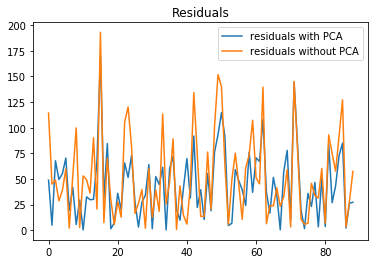

In [422]:
prediction1 = ols1.predict(np.dot(X_test, sort_vectors.T))
prediction2=ols2.predict(X_test)
residuals1 = np.abs(prediction1 - Y_test)
residuals2 = np.abs(prediction2 - Y_test)

plt.plot(residuals1,label='residuals with PCA')
plt.plot(residuals2,label='residuals without PCA')
plt.legend()
plt.title('Residuals')

The residuals with PCA are inferior, what was expected.

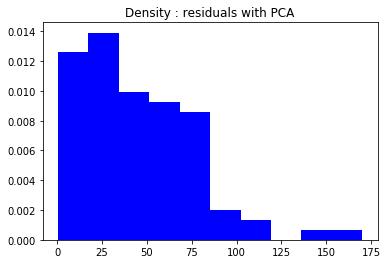

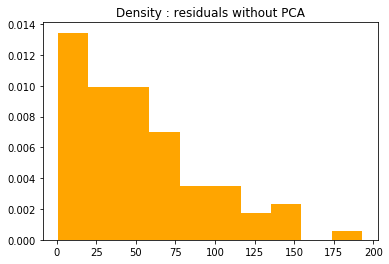

In [423]:
plt.hist(residuals1,density=True,color="blue")
plt.title("Density : residuals with PCA")
plt.show()

plt.hist(residuals2,density=True,color='orange')
plt.title("Density : residuals without PCA")
plt.show()

<b> Calculate the determination coefficient for the test sample. Calculate the prediction risk for the test sample. <b/>

In [424]:
# Determination coefs 

R1=ols1.score(np.dot(X_test, sort_vectors.T),Y_test)
R2=ols2.score(X_test,Y_test)

print"The determination coefficient with PCA is:",np.sqrt(R1)
print"The determination coefficient without PCA is:",np.sqrt(R2)
print"These with PCA is better but we can do better."

The determination coefficient with PCA is: 0.6952594726041654
The determination coefficient without PCA is: 0.4964230477836459
These with PCA is better but we can do better.


In [425]:
# Prediction risks

PR1=np.dot(residuals1,residuals1.T)/len(Y_test)
PR2=np.dot(residuals2,residuals2.T)/len(Y_test)

print"The prediction risk with PCA is",PR1
print"The prediction risk without PCA is",PR2

The prediction risk with PCA is 3042.395087776853
The prediction risk without PCA is 4437.817620364906


## Question 8 

<b> Program the method of the forward variable selection. You can use the test statistics of the test
for nullity. <b/>

In [426]:
n=X_train.shape[0]
p=X_train.shape[1]

to_treat=list(range(p))
treated=[]

Tn = np.zeros((p,p))
p_values = np.zeros((p,p))

residuals = Y_train   #residuals are necessary to evaluate sigma²

for i in range(p):
    new_residuals = np.zeros((n,p))     #initialization
    for j in to_treat:                  #We calculate the p_value for each variable not treated yet
        ols3=LinearRegression(fit_intercept=False).fit(X_train[:,[j]], residuals)
        new_residuals[:,j] = abs(residuals - ols3.predict(X_train[:,[j]]))
        sig_2=np.sum(new_residuals[:,j]**2)/(n-1)
        snk_2 =float(n)/(np.sum(X_train[:,j]**2))
        Tn[i,j]=np.sqrt(n)* np.abs(ols3.coef_)/(np.sqrt(sig_2*snk_2))  #we calulate the test
        p_values[i,j] = 2*(1-norm.cdf(np.abs(Tn[i,j])))
        
    in_treatment = np.argmax(Tn[i,:])
    to_treat.remove(in_treatment)
    treated.append(in_treatment)
    residuals = new_residuals[:,in_treatment]

print"The order of selection is :",treated

The order of selection is : [58, 123, 130, 80, 118, 103, 208, 147, 59, 89, 158, 174, 135, 99, 133, 189, 17, 34, 37, 77, 16, 79, 9, 23, 56, 69, 78, 11, 148, 108, 206, 72, 136, 15, 171, 93, 107, 71, 153, 41, 140, 128, 82, 182, 139, 22, 200, 45, 87, 63, 188, 116, 106, 184, 146, 14, 157, 162, 42, 104, 75, 204, 98, 198, 1, 190, 180, 12, 64, 138, 172, 111, 5, 160, 167, 178, 192, 88, 120, 97, 28, 95, 54, 50, 125, 196, 6, 183, 205, 114, 57, 195, 68, 152, 74, 49, 176, 26, 137, 19, 67, 90, 193, 165, 112, 121, 52, 27, 202, 131, 168, 60, 33, 18, 197, 31, 25, 13, 83, 81, 141, 166, 122, 53, 159, 3, 156, 185, 102, 175, 201, 55, 0, 84, 47, 115, 7, 21, 154, 177, 8, 150, 191, 110, 66, 96, 36, 24, 70, 43, 126, 46, 4, 100, 105, 207, 203, 119, 92, 35, 161, 44, 109, 209, 38, 144, 10, 29, 94, 170, 134, 143, 181, 173, 164, 129, 145, 151, 61, 169, 142, 62, 39, 20, 163, 51, 101, 86, 194, 32, 187, 149, 73, 132, 117, 76, 85, 124, 155, 186, 48, 30, 40, 179, 2, 91, 127, 65, 113, 199]


## Question 9 

<b> Stop criterion: We choose to stop if the p-value is larger than 0.1. <b/>

In [427]:
to_treat2=list(range(p))
treated2=[]
Tn2 = np.zeros((p,p))
p_values2 = np.zeros((p,p))
residuals2 = Y_train   #residuals are necessary to evaluate sigma²

test=True
i=0

while test and i<p:
    test=False
    new_residuals2 = np.zeros((n,p))     #initialization
    for j in to_treat2:                  #We calculate the p_value for each variable not treated yet
        ols3=LinearRegression(fit_intercept=False).fit(X_train[:,[j]], residuals2)
        new_residuals2[:,j] = abs(residuals2 - ols3.predict(X_train[:,[j]]))
        sig_2=np.sum(new_residuals2[:,j]**2)/(n-1)
        snk_2 =n/np.sum(X_train[:,j]**2)
        Tn2[i,j]=np.sqrt(n)* np.abs(ols3.coef_)/(np.sqrt(sig_2*snk_2))
        p_values2[i,j] = 2*(1-norm.cdf(Tn2[i,j]))
    
    in_treatment2 = np.argmax(Tn2[i,:])
    if p_values2[i,in_treatment2]<0.1:
        test=True
        to_treat2.remove(in_treatment2)
        treated2.append(in_treatment2)
        residuals2 = new_residuals2[:,in_treatment2]
    i+=1
    
print(treated2)

[58, 123]


<b> The 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables (in
abscissa: the indices of the variables; in the ordinate: the value of the test statics) <b/>

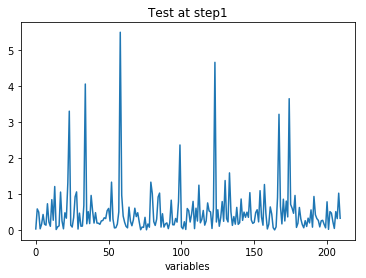

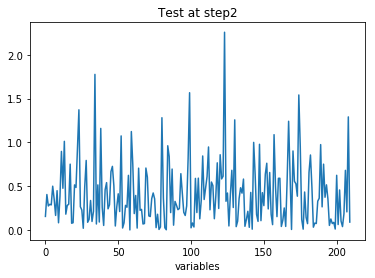

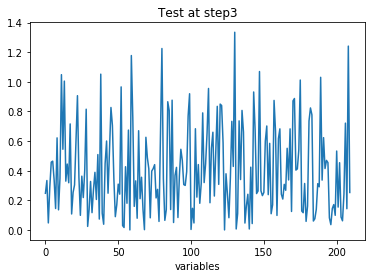

In [428]:
for k in range(3):
    plt.plot(np.arange(p),Tn[k,:])
    plt.title("Test at step"+str(k+1))
    plt.xlabel("variables")
    plt.show()

<b> The graphs of the first 50 p-values (each associated to a selected variable). On the same plot, trace the horizontal line with the ordinate 0.1.

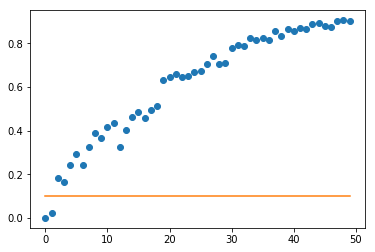

In [429]:
p_values_graph=[]

for k in range(50):
    p_values_graph.append(p_values[k,treated[k]])
    
plt.plot(p_values_graph,marker='o',linestyle='None')
plt.plot(np.arange(50),50*[0.1])

<b> Finally, provide the list of the selected variables. <b/>

In [430]:
print "We keep the variables",treated2

We keep the variables [58, 123]


## Question 10 

<b> Run OLS on the selected variables. Provide the prediction risk for the test sample and compare
with those for OLS and PCA before OLS. <b/>

In [431]:
n=len(treated2)
X_train_selected=np.zeros((len(X_train),n))
X_test_selected=np.zeros((len(X_test),n))

for k in range(n):
    index=treated2[k]
    X_train_selected[:,k]=X_train[:,index]
    X_test_selected[:,k]=X_test[:,index]

ols_selected_var=LinearRegression().fit(X_train_selected,Y_train)

In [432]:
prediction=ols_selected_var.predict(X_test_selected)
residuals = np.abs(prediction - Y_test)
PR1=np.dot(residuals,residuals.T)/len(Y_test)
print"The new prediction risk is ",PR1

print"The new score is", np.sqrt(ols_selected_var.score(X_test_selected,Y_test))

The new prediction risk is  2941.73715875094
The new score is 0.7074446734941334


We obtain results not very different than those with the PCA...

## Question 11

<b> To prepare for the cross-validation, split randomly the train sample in 4 equal parts (called “folds”). <b/>

In [433]:
fold0=[]
fold1=[]
fold2=[]
fold3=[]

n=len(x_train)

to_treat=[]
for i in range(n):
    to_treat.append(i)

k=0

while to_treat!=[]:
    index=random.choice(to_treat)
    to_treat.remove(index)
    if k%4==0:
        fold0.append(x_train[index])
    if k%4==1:
        fold1.append(x_train[index])
    if k%4==2:
        fold2.append(x_train[index])
    if k%4==3:
        fold3.append(x_train[index])
    k+=1
        
        
fold0=np.array(fold0)     
fold1=np.array(fold1)   
fold2=np.array(fold2)
fold3=np.array(fold3)

folds=(fold0,fold1,fold2,fold3)

<b> Provide the numbers of the observations falling into each fold. <b/>

In [434]:
print"The number of observations into fold0 is", len(folds[0]),"."
print"The number of observations into fold1 is", len(folds[1]),"."
print"The number of observations into fold2 is", len(folds[2]),"."
print"The number of observations into fold3 is", len(folds[3]),"."

The number of observations into fold0 is 89 .
The number of observations into fold1 is 88 .
The number of observations into fold2 is 88 .
The number of observations into fold3 is 88 .


## Question 12

<b> Apply the ridge regression method. For the choice of the regularization parameter, run the cross-
validation on the “folds” defined in the previous question. Each “fold” is used to calculate the
prediction risk while the resting ones are used for estimating the model. Then the 4 risks are
averaged. Plot the estimated risk curve as a function of the regularization parameter <b/>

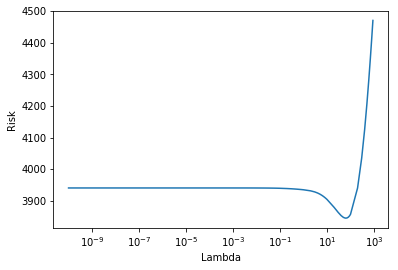

In [435]:
lambdas= [1e-10]+[i * 10**j for j in range(-3,3) for i in range(1,10)]

p=x_train.shape[1]
risks = len(lambdas)*[0]

for k in range(4):
    X_train_=np.concatenate([folds[i][:,:p-1] for i in range(4) if i!=k])
    Y_train_=np.concatenate([folds[i][:,p-1] for i in range(4) if i!=k])
    X_test_=folds[k][:,:p-1]
    Y_test_=folds[k][:,p-1]
    for i in range(len(lambdas)):
        ridge = Ridge(lambdas[i]).fit(X_train_, Y_train_)
        risks[i] += ((np.linalg.norm(ridge.predict(X_test_) - Y_test_)**2)/len(Y_test_))
        
risks=np.array(risks)/4

plt.plot(lambdas, risks)
plt.xscale("log")
plt.ylabel("Risk")
plt.xlabel("Lambda")
plt.show()

<b> Provide the optimal regularization parameter and the corresponding risk for the test sample. <b/>

In [436]:
best_lambda=np.argmin(risks)
print"The best regulation parameter lambda is : ", lambdas[best_lambda]
print"The best risk corresponding is :", risks[best_lambda]

The best regulation parameter lambda is :  60
The best risk corresponding is : 3844.816472999051


## Question 13

<b> Using the function lassoCV of the library sklearn, choose the regularization parameter for the
LASSO. Provide the corresponding risk. <b/>

In [437]:
reg=LassoCV(cv=4).fit(X_train, Y_train)
PR=np.sum((reg.predict(X_test) - Y_test)**2)/len(X_test)

print"The regularization parameter is :",reg.alpha_
print"The corresponding risk is :",PR

The regularization parameter is : 5.3958461003081615
The corresponding risk is : 2851.9743681196933


The risk is better than the one we obtained with the classical OLS. 

## Question 14

<b>Provide the variables selected by the LASSO. How many are they?<b>

In [438]:
selected_var=[]
nb=0 

for i in range(len(reg.coef_)):
    if reg.coef_[i]!=0:
        selected_var.append(i)
        nb+=1
        
print"There are",nb,"selected variables."

There are 10 selected variables.


<b>Apply the OLS method to the selected variables. This method is called Least-square LASSO.<b/>

In [439]:
n=len(selected_var)
X_train_selected=np.zeros((len(X_train),n))
X_test_selected=np.zeros((len(X_test),n))

for k in range(n):
    index=selected_var[k]
    X_train_selected[:,k]=X_train[:,index]
    X_test_selected[:,k]=X_test[:,index]

ols_selected_var=LinearRegression().fit(X_train_selected,Y_train)

In [440]:
prediction=ols_selected_var.predict(X_test_selected)
residuals = np.abs(prediction - Y_test)
PR1=np.dot(residuals,residuals.T)/len(Y_test)
print"The new prediction risk is ",PR1

print"The new score is", np.sqrt(ols_selected_var.score(X_test_selected,Y_test))

The new prediction risk is  2902.3729920584888
The new score is 0.7121532160569031


It's the better score so this technic is efficient.